# Лабораторная работа 1

### Технологии анализа данных в сети Интернет

*Иванчиков Борис*

In [113]:
import re
import codecs

## Задание 1

*Найти в тексте запись об указании времени в формате чч:мм:сс. В заданном формате чч - целое число из диапазона от 00 до 23, мм и сс - целые числа из диапазона от 00 до 59 (если какая-то часть формата нарушена, то данная подстрока в качестве верного значения не рассматривается).*

In [114]:
with codecs.open("task1.txt", 'r', 'utf-8') as f:
    text = f.read()
    result = re.findall(r'\b((?:(?:[0-1][0-9])|(?:2[0-3])):(?:[0-5][0-9]):(?:[0-5][0-9]))\b', text)
    print(text)
    print("\n")
    print(f'Matches: {result}')

Правильно:
00:00:00
23:59:59
11:12:13

Неправильно:
24:00:00
11:22
23::59:59
01:01:011
23:60:01
1:59:59


Matches: ['00:00:00', '23:59:59', '11:12:13']


Видим, что были найдены правильные строки. В выражении используются символы `?:`, чтобы метод `findall` учитывал только внешнюю группу (всё слово), а не внутренние группы.

*Пояснение к выражению: для часов отбираем числа в диапазоне от 00 до 19 и от 20 до 23, для минут и секунд -- в диапазоне от 00 до 59.*

## Задание 2

*Найти в тексте знаки препинания (точка, запятая, точка с запятой, двоеточие, тире («минус», длинное и короткое), вопросительный и восклицательный знаки, многоточие (три идущие подряд точки и отдельный символ «…» )).*

In [115]:
with codecs.open("task2.txt", 'r', 'utf-8') as f:
    text = f.read()
    result = re.findall(r'((?:\.{3})|[\.,;:!?\-\u2014\u2013\u2026])', text)
    print(text)
    print("\n")
    print(f'Matches: {result}') 

— Привет! Как дела? 
— Привет! Всё отлично, спасибо! У тебя как? 
— Тоже всё хорошо! У нас сегодня планы на вечер? 
— Да, давай сходим в кино! Я слышал, там идет новый фильм-боевик, который все хвалят. 
— Звучит заманчиво... Во сколько собираемся? 
— Давай встретимся около 7 вечера у кинотеатра. Это нормально для тебя? 
— Конечно, это отличное время! Я уже жду с нетерпением нашей встречи! 
— Я тоже! Уверен, что фильм будет отличным и мы проведем прекрасный вечер вместе! 
— Согласен полностью! Давай тогда не будем терять время и встретимся вовремя…
— Окей, договорились! До встречи! 
— До скорой встречи! Удачного дня!


Matches: ['—', '!', '?', '—', '!', ',', '!', '?', '—', '!', '?', '—', ',', '!', ',', '-', ',', '.', '—', '...', '?', '—', '.', '?', '—', ',', '!', '!', '—', '!', ',', '!', '—', '!', '…', '—', ',', '!', '!', '—', '!', '!']


Код верно находит все знаки препинания, три точки считает одной группой.

*Пояснение к выражению: отбираем все знаки препинания, в том числе длинное тире (`\u2014`) и многоточие (`\u2026`), "среднее" тире (`\u2013`), а также группу, состоящую из трех точек*

## Задание 3

*В тексте могут содержаться IP-адреса компьютеров в формате d.d.d.d, где d - целое число из диапазона от 0 до 255. Найти все IP-адреса, содержащиеся в тексте.*

In [116]:
with codecs.open("task3.txt", 'r', 'utf-8') as f:
    text = f.read()
    result = re.findall(r'(\b(?:(?:(?:[0-9])|(?:[1-9][0-9])|(?:1[0-9][0-9])|(?:2[0-4][0-9])|(?:25[0-5]))\.){3}(?:(?:[0-9])|(?:[1-9][0-9])|(?:1[0-9][0-9])|(?:2[0-4][0-9])|(?:25[0-5]))\b)', text)
    print(text)
    print("\n")
    print(f'Matches: {result}') 

IP-адрес – это строка чисел, разделенных точками. IP-адреса представляют собой набор из четырех чисел, например, 192.158.1.38. Каждое число в этом наборе принадлежит интервалу от 0 до 255. Таким образом, полный диапазон IP-адресации – это адреса от 0.0.0.0 до 255.255.255.255.

Пример правильных IP-адресов:
246.254.223.241
0.8.127.249
145.250.62.191
217.231.19.10
223.253.30.100

Пример неправильных IP-адресов: 
00.0.0.0
257.255.1.1
223.253,30.100
223.253.30.1000


Matches: ['192.158.1.38', '0.0.0.0', '255.255.255.255', '246.254.223.241', '0.8.127.249', '145.250.62.191', '217.231.19.10', '223.253.30.100']


Видим, что программа правильно отобрала все 8 IP-адресов.

*Пояснение к выражению: отбираем числа из диапазонов 0-9, 10-99, 100-199, 200-249, 250-254. Повторяем три раза с точкой на конце, а затем еще раз без точки*

## Задание 4

*Проверить надежно ли составлен пароль. Пароль считается надежным, если он состоит из 8 или более символов. Пароль должен содержать хотя бы одну заглавную букву, одну маленькую букву одну цифру, хотя бы один специальный символ («!», «@», «#», «$», «%», «^», «&», «\*») и не является последовательностью («123456Qwerty», «Ps123456789», «Qwerty1»).*

In [117]:
with codecs.open("task4.txt", 'r', 'utf-8') as f:
    text = f.read()
    result = re.findall(r"^((?!.*[Qq][Ww][Ee][Rr][Tt][Yy]|.*123)(?=.*[A-Z])(?=.*[a-z])(?=.*\d)(?=.*[!@#$%^&*])\S{8,})", text, flags=re.M)
    print(text)
    print("\n")
    print(f'Matches: {result}')

Хорошие пароли:
abcFDnjdsDhdkjha3#29q
KLJklD^&&*6D78DS@+
1GGhjfhj1d#

Плохие пароли:
abc
password
Password123
Qwerty***
MYPASSWORD!
123$$$ONme


Matches: ['abcFDnjdsDhdkjha3#29q', 'KLJklD^&&*6D78DS@+', '1GGhjfhj1d#']


Таким образом, мы отобрали только хорошие пароли

*Пояснение к выражению: выбираем пароли, в которых больше 8 непробельных символов. В пароле смотрим, что есть заглавная буква/строчная буква/число/спецсимвол, перед которыми идет любое количество символов. Также смотрим, что пароль не содержит строки `qwerty` в любом регистре и строки `123`.*

## Задание 5

*Выделить в тексте прямую речь с опорой на пунктуацию (см. http://www.gramota.tv/biblio/textbooks/gramota/punct/343-45-192?ysclid=lne281u9yq246756449).*

In [118]:
with codecs.open("task5.txt", 'r', 'utf-8') as f:
    S = '[А-Я][a-я ,\-]*'
    S_dot = '[А-Я][a-я \.,;:!?\-\u2014\u2026\u2013]*'
    s = '[а-я][a-я ,\-]*'
    s_dot = '[а-я][a-я \.,;:!?\-\u2014\u2026\u2013]*'
    lb = '\u00AB'
    rb = '\u00BB'
    dash = '[-\u2014\u2013]'

    text = f.read()
    result = re.findall(fr'((?:{lb}{S}[а-я]{rb}, {dash} {s}\.)'
                        fr'|(?:{lb}{S}[!?]{rb} {dash} {s}\.)'
                        fr'|(?:{S}: {lb}{S}{rb} {dash} {s}\.)'
                        fr'|(?:{S}: {lb}{S}[а-я]{rb}\.)'
                        fr'|(?:{S}: {lb}{S}[!?]{rb})'
                        fr'|(?:{lb}{S}, {dash} {s}, {dash} {s_dot}{rb}\.)'
                        fr'|(?:{lb}{S}, {dash} {s}\. {dash} {S_dot}{rb})'
                        fr'|(?:{lb}{S}, {dash} {s}, {dash} {s_dot}[!?]{rb})'
                        fr'|(?:{lb}{S}, {dash} {s}\. {dash} {S_dot}[!?]{rb})'
                        ')', 
                        text)
    print(text)
    print("\nMatches:\n")
    print(*result, sep="\n")

«Далече ли до крепости?» – спросил я у своего ямщика. По моим подсчетам, до крепости оставалось не больше часа.
Ямщик скривил лицо. «Далече до крепости», – ответил мне ямщик, явно недовольный таким вопросом. 
«а?» – переспросил я у ямщика. 
«Б!» – ответил мне ямщик.
Далее состоялся следующий диалог:
Я: «Так далече ли до крепости?»
Ямщик: «Меньше вопросов».
«Вы остры на язык, – отметил я, и добавил, - не совестно ли вам так общаться с барином?»
«А вы не выеживайтесь, – отрезал ямщик, почесав бороду. - Не вам меня учить».
Тем временем, мы приехали и увидели девушку.
«Слава богу, – сказала девушка, – насилу вы приехали. Чуть было вы барышню не уморили».
Затем девушка обратилась ко мне. «Тише, – говорит она мне, – отец болен, при смерти, и желает с тобою проститься».
«Отец?» – спросил я. Она вскрикнула: «Ай, не он, не он!» – и упала без памяти.

Matches:

«Далече ли до крепости?» – спросил я у своего ямщика.
«Далече до крепости», – ответил мне ямщик, явно недовольный таким вопросом.
«Б!» –

Видим, что мы смогли отобрать все *верно написанные* варианты прямой речи.

*Пояснение:*
`S`, `s` - строки, начинающиеся с большой и маленькой букв соответственно, могут содержать пробелы, буквы, дефисы и запятые.

`S_dot`, `s_dot` - то же самое, но могут содержать точки и другие знаки препинания (например, несколько предложений).

`lb, rb` - левые и правые кавычки-елочки.

`dash` - символы-тире.

Такие обозначения помогут нам улучшить читаемость выражения.

Выражение отбирает всевозможные варианты пунктуации с помощью оператора `|`. Выражения `[а-я]` и `[!?]` используются как индикатор того, что строка оканчивается на букву или на восклицательный/вопросительный знак. Также стоит отметить, что случай 4 стоит в выражении перед случаем 2, так как иначе случай будет ошибочно воспринят за второй. В остальном написание регулярного выражение интуитивно понятно.



## Задание 6

*Выделить в тексте предложения с обобщающими словами. Рассмотреть все варианты пунктуации. (Например: «Всякий день стал приносить старый Мосеич разную крупную рыбу: щук, язей, голавлей, линей, окуней.») (см. http://gramota.ru/class/coach/punct/45_190?ysclid=lne2kwryum489092268).*

In [119]:
with codecs.open("task6.txt", 'r', 'utf-8') as f:
    S = '[А-Я][ a-я,\-\u2014\u2013]*'
    s = '[а-я][ a-я,\-\u2014\u2013]*'
    dash = '[-\u2014\u2013]'

    text = f.read()
    result = re.findall(fr'((?:(?:{S}|{s}): (?:{s}, ){{1,}}{s} {dash} {s}\.)'
                        fr'|(?:(?:{S}, ){{1,}}{s} {dash} {s}\.)'
                        fr'|(?:(?:{S}|{s}): (?:{s}, ){{1,}}{s}\.)'
                        ')', 
                        text)
    print(text)
    print("\nMatches:\n")
    print(*result, sep="\n")

Обобщающие слова могут быть выражены также цельными словосочетаниями, например:
Всякий день стал приносить старый Мосеич разную крупную рыбу: щук, язей, голавлей, линей, окуней.
В этом предложении обобщающим будет сочетание РАЗНУЮ КРУПНУЮ РЫБУ.
В предложениях с обобщающими словами знаки препинания ставятся в соответствии с правилом из трех основных пунктов.
1. Если обобщающее слово стоит перед однородными членами, то после него ставится двоеточие.
Желтые кленовые листья лежали всюду: на дорожках, на скамейках, на крышах машин.
2. Если обобщающее слово стоит после однородных членов, то перед ним ставится тире.
На дорожках, на скамейках, на крышах машин – всюду лежали желтые кленовые листья.
3. Если обобщающее слово стоит перед однородными членами, а после них предложение продолжается, то после обобщающего слова ставится двоеточие, а после однородных членов – тире.
Всюду: на дорожках, на скамейках, на крышах машин – лежали желтые кленовые листья.

Matches:

Всякий день стал приносить ста

*Пояснение:*

Здесь мы применяем тот же подход:

`S`, `s` - строки, начинающиеся с большой и маленькой букв соответственно, могут содержать пробелы, буквы, дефисы и запятые.

`dash` - символы-тире.

Выражение отбирает всевозможные варианты пунктуации с помощью оператора `|`. Здесь мы используем строку `(?:{s}, ){{1,}}{s}`, чтобы определить перечисление каких-то объектов. 

К сожалению, в результате мы отобрали следующее предложение:

*"Если обобщающее слово стоит перед однородными членами, а после них предложение продолжается, то после обобщающего слова ставится двоеточие, а после однородных членов – тире."*

Однако она пунктуационно не отличается от предложения с обобщающим словом, например, таким: 

*"На дорожках, освещаемых тусклым светом фонарей, на скамейках, мокрых от дождя, на крышах машин – всюду лежали желтые кленовые листья."* 

Такие предложения неизбежно попадут в нашу выборку, если мы как-то дополнительно не ограничим перечисляемые слова (например, количество слов в одном "блоке"), но это тоже будет не совсем корректно.


## Задание 7

*Дан текст с географическими названиями населенных пунктов (г. Пермь, п. Скобелевка, …). Найти вхождения населенных пунктов:*
- *г - город;*
- *пгт - поселок городского типа;*
- *рп - рабочий поселок;*
- *кп - курортный поселок;*
- *к - кишлак;*
- *дп - дачный поселок;*
- *п - поселок;*
- *п. ст - поселок при станции (поселок станции);*
- *с - село;*
- *д - деревня;*
- *сл - слобода;*
- *ст - станция;*
- *ст-ца - станица;*
- *х - хутор;*
- *у - улус;*
- *рзд - разъезд;*
- *зим - зимовье.*

In [120]:
with codecs.open("task7.txt", 'r', 'utf-8') as f:
    S = '[А-Я][a-я\-]*[а-я]'

    text = f.read()
    result = re.findall(fr'((?:(?:(?:г|пгт|рп|кп|к|дп|п|п\. ст|с|д|сл|ст|х|у|рзд|зим)\.)|(?:ст\-ца)) {S})', 
                        text)
    print(text)
    print("\nMatches:\n")
    print(*result, sep="\n")

В небольшой деревне д. Новоселки, расположенной в живописной Смоленской области, жители мирно живут своей повседневной жизнью. Недалеко от деревни протекает река, на берегу которой раскинулись уютные дачные поселки, такие как дп. Зеленогорский и п. Жуковка. 
Через поле и лесополосы можно добраться до пгт. Сочи, известного курортного города на Черноморском побережье. Многие жители села мечтают провести отпуск в этом курортном поселке и насладиться морским бризом.
Но есть и те, кто предпочитает тишину и уединение. Они отправляются в хутор х. Красногорский, где можно насладиться природными красотами Белгородской области и побыть наедине с собой.
Вдали от суеты городов, на берегу озера, находится дп. Скобелевка. Здесь люди строят дачи и проводят свои выходные и праздники, наслаждаясь спокойствием и красотой природы.
Не так далеко от этих мест находится ст. Павловская, железнодорожная станция, откуда можно отправиться в путешествие по Краснодарскому краю и посетить курортные станицы, наприм

*Пояснение:* Здесь мы просто перечисляем всевозможные сокращения с помощью оператора `|`, а также отдельно обрабатываем случай `ст-ца`, так как после нее не ставится точка. Далее идет название населенного пункта с большой буквы, может содержать буквы и дефисы.

## Задание 8

*Решить задачи (20 заданий) на ресурсе https://www.spoj.com/SHORTEN/problems/regex/.  (Ресурс доступен через VPN. В качестве результата в отчете представить снимок экрана и пояснить логику решения.)*

Я осилил только 17 заданий (вместе с заданиями на сайте https://alf.nu/RegexGolf?world=regex&level=r010) :(
1. Warmup: `.*foo` - отбираем слова, содержащие подслово 'foo'
2. Anchors: `.*ick$` - слова, оканчивающиеся на 'ick'
3. It never ends: `.*fu\b` - то же самое, но по условию символ $ запрещен, вместо него используем границу слова
4. Ranges: `^[a-f]*$` - слова, содержащие только буквы от 'a' до 'f'
5. Backrefs: `(...).*\1.*` - слова, у которых первые три символа повторяются где-то далее в том же порядке
6. Abba: `^(?!.*(.)(.)\2\1.*).*$` - слова, в которых нет подслова-палиндрома из 4 букв
7. A man, a plan: `^(.)(.).*\2\1$` - слова, у которых первая буква совпадает с последней, а вторая - с предпоследней
8. Prime: `^(?!(xx+)\1+$).*` - слова, состоящие из $n$ иксов, где $n$ не выражаются как произведение $k_i$, где $k_i \geqslant 2$, то есть на самом деле простые $n$
9. Four: `(?=(.).\1.\1.\1).*` - слова, в которых есть буква, которая повторяется 4 раза 'через одну'.
10. Order: `^a*b*c*d*e*f*g*h*i*l*m*n*o*p*r*s*t*w*y*z*$` - слова с буквами в алфавитном порядке
11. Balance: `^(<(<(<(<(<(<(<(<(<(<>)*>)*>)*>)*>)*>)*>)*>)*>)*>)*$` - правильные скобочные последовательности из знаков <, >, подпоследовательность любого 'порядка' от 1 до 10 (т.е. '<>', '<<>>', и так далее) может встречаться любое количество раз, и так мы можем получить любую правильную последовательность
12. Powers: `^(?!^(x(xx)+)\1*$)x*$` - словасостоящие из $n$ иксов, которое не выражается в виде $k \cdot m$, где $k$ -- нечетное, то есть по сути степень двойки.
13. Long count: `0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111` - здесь просто отобрал саму строку
14. Powers 2: `^(?!^xx$)(?!^(x{1,2}(xxx)+)\1*$)x*$` - аналогично заданию 12, $n$ не может выражаться как $k \cdot m$, где $k = 1 \text{ или } 2 \text{ (mod. } 3)$, а также не может быть равно 2
15. qntm: `^(b[ ac-z].*$)|([ ac-z].*)|(^$)|((^b$))` - в задании нельзя использовать символ ?, поэтому просто перебираем все варианты: либо это пустая строка, либо строка 'b', либо строка начинается на 'b' и второй символ не 'b', либо строка начинается не на 'b'
16. Subtraction: `^(x*)(x*) - \1 = \2$` - отбираем те строки, в которых уменьшаемое можно разбить на два подслова так, чтобы первое равнялось вычитаемому, а второе - разности
17. Typist: `^[wertasdfgzxcvb]*$` - отбираем слова только из символов из левой части клавиатуры

На задаче Glob галочка стоит, но я ее не решил, там не все слова правильно находятся.

Прилагаю скриншоты. Справа полужирным выделены нерешенные задачи.

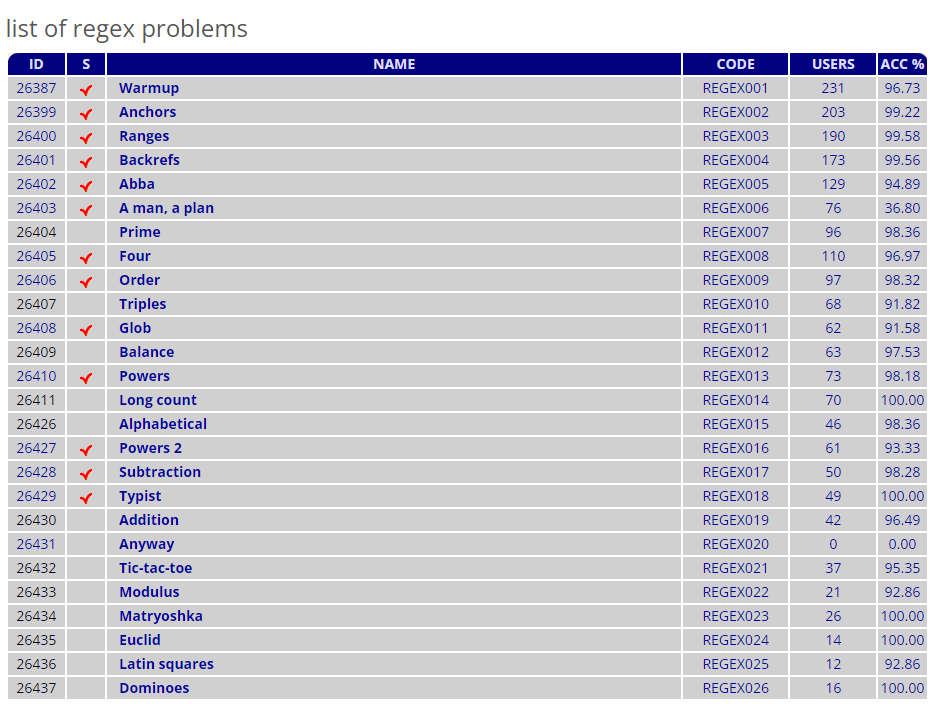 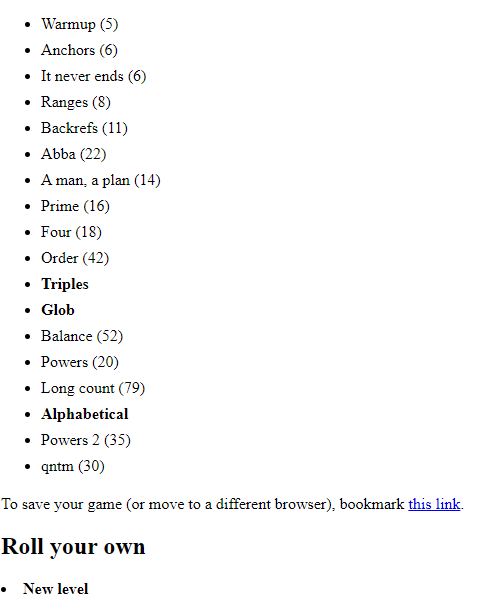

## Задание 9

*Написать программу (Python, С# или любой другой язык программирования) для построения частотного словаря текста на русском языке без учета стоп-слов. Входной текст хранится в текстовом файле, построенный словарь также должен быть сохранен в текстовый файл в формате (словоформа, количество_вхождений_словоформы) с сортировкой по количеству вхождений. Для деления текста на токены и удаления стоп-слов использовать библиотеку nltk, а для нормализации использовать библиотеку Pymorphy2.*

*Комментарий:* в заданиях 9-10 будем анализировать текст романа "Обломов" И. Гончарова

In [121]:
from nltk.corpus import stopwords           
from nltk.tokenize import word_tokenize     
import pymorphy2
from tqdm import tqdm                      #библиотека для выведения шкалы загрузки
from collections import defaultdict 


In [122]:
with codecs.open("task9.txt", 'r') as f:                                                                        #считываем текст из файла
    text = f.read()

morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))                                                                    #стоп-слова
punct = set('.,:;!?-\u2014\u2013\u2026()\'`\u00AB\u00BB…')                                                      #знаки пунктуации
word_tokens = word_tokenize(text)                                                                               #разбиваем предложение на токены
word_tokens = [word for word in word_tokens if word not in stop_words and len(set(word) & punct) == 0]          #убираем стоп-слова и знаки пунктуации


freqlist = defaultdict(int)                                                                                     #создаем частотный словарь

for i in tqdm(range(len(word_tokens))):
    word = morph.parse(word_tokens[i])[0].normal_form
    freqlist[word] += 1                                                                                         #записываем количество вхождения слова

out = open('task9_result.txt', 'w')
out.close()

words = sorted(freqlist.keys(), reverse=True, key=lambda word: freqlist[word])                                  #сортируем получившийся словарь и записываем в файл
for i in tqdm(range(len(words))):
    word = words[i]
    out = open('task9_result.txt', 'a')
    out.write(f'{word}: {freqlist[word]}\n')
    out.close()

100%|██████████| 11005/11005 [00:06<00:00, 1665.78it/s]


В файле `task9_result.txt` можно найти получившийся в результате частотный словарь.

## Задание 10

*Реализовать вторую версию программы (см. задание 1) построения частотного словаря, в которой для нормализации используется стеммер (найти необходимую библиотеку самостоятельно). Сравнить построенные частотные словари.*

In [123]:
from nltk.stem.snowball import RussianStemmer   #используем стеммер из библиотеки nltk

In [124]:
with codecs.open("task9.txt", 'r') as f:
    text = f.read()

stemmer = RussianStemmer()
stop_words = set(stopwords.words('russian'))
punct = set('.,:;!?-\u2014\u2013\u2026()\'`\u00AB\u00BB…')
word_tokens = word_tokenize(text)
word_tokens = [word for word in word_tokens if word not in stop_words and len(set(word) & punct) == 0]


freqlist2 = defaultdict(int)

for i in tqdm(range(len(word_tokens))):
    word = stemmer.stem(word_tokens[i])
    freqlist2[word] += 1

out = open('task10_result.txt', 'w')
out.close()

words = sorted(freqlist2.keys(), reverse=True, key=lambda word: freqlist2[word])
for i in tqdm(range(len(words))):
    word = words[i]
    out = open('task10_result.txt', 'a')
    out.write(f'{word}: {freqlist2[word]}\n')
    out.close()

100%|██████████| 11321/11321 [00:06<00:00, 1630.27it/s]


В файле `task10_result.txt` можно найти получившийся в результате частотный словарь.

Сравним словари. Для этого выведем их.

In [125]:
words1 = sorted(freqlist.keys(), reverse=True, key=lambda word: freqlist[word])[:20]
vals1 = sorted(freqlist.values(), reverse=True)[:20]
words2 = sorted(freqlist2.keys(), reverse=True, key=lambda word: freqlist2[word])[:20]
vals2 = sorted(freqlist2.values(), reverse=True)[:20]
print("\n".join("{:>15} {:>4}    {:>15} {:>4}".format(word1, val1, word2, val2) for word1, val1, word2, val2 in zip(words1, vals1, words2, vals2)))

        обломов 1183                 он 1170
        сказать 1053                 эт 1096
            это  957              облом  903
             он  769              сказа  890
       говорить  658              говор  660
          захар  597              захар  597
              а  575                  а  581
            что  526                как  506
              я  493               друг  475
             ты  482                что  465
           свой  463                сво  463
          ольга  442               ольг  442
            она  436              спрос  433
       спросить  434                 да  432
          жизнь  431               жизн  431
          знать  424                 ил  408
           илья  392                  я  401
             да  382                так  394
           глаз  370              котор  372
        который  366               глаз  370


Видим, что словари в целом близки, но в некоторых моментах отличаются. Например, слово `сказать` в первом словаре встречается чаще, чем во втором слово `сказ`. Это происходит потому, что, например, слово `скажете` в первом слове преобразуется в `сказать`, а во втором - в `скаж`, и считается там отдельно. А слово `друг`, например, встречается чаще во втором словаре, так как в это слово преобразуются слова `друг` и `другой`. Мне кажется, что для русского языка более точно будет применять первый способ. С другой стороны, второй способ работает быстрее.

## Задание 11

*Собрать корпус документов по выбранной теме и по основы программ, разработанных в заданиях 1 и 2, подсчитать метрику TF-IDF для ключевых слов документа.*

В папке `task11` хранятся 15 рецензий на фильм Легенда (2015), названные как `file1`, `file2`, ..., `file15`. Метрику TF-IDF будем считать для слов из первого файла (`file1`)

In [126]:
import math

morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))
punct = set('.,:;!?-\u2014\u2013\u2026()\'`\u00AB\u00BB…')

freqlists = [defaultdict(int)] * 15                                                                         #создаем список частотных словарей для каждого текста

for doc_index in range(1, 16):
    with codecs.open(f"task11/file{doc_index}.txt", 'r', encoding='utf-8') as f:
        text = f.read()
    word_tokens = word_tokenize(text)
    word_tokens = [word for word in word_tokens if word not in stop_words and len(set(word) & punct) == 0]
    for i in range(len(word_tokens)):
        word = morph.parse(word_tokens[i])[0].normal_form
        freqlists[doc_index-1][word] += 1                                                                  #заполняем частотный словарь

words = freqlists[0].keys()
doc_number = defaultdict(int)                                                                              #словарь количества документов, содержащих слово
for word in words:
    for doc_index in range(1, 16):
        if freqlists[doc_index-1][word] > 0:
            doc_number[word] += 1

tf_idf = defaultdict(float)                                                                                #словарь с индексом tf-idf
for word in words:
    tf_idf[word] = freqlists[0][word] * math.log(16 / doc_number[word])

words = sorted(tf_idf.keys(), reverse=True, key=lambda word: tf_idf[word])[:20]
vals = sorted(tf_idf.values(), reverse=True)[:20]
print("\n".join("{:>15} {:>5}".format(word, val) for word, val in zip(words, vals)))

          фильм 4.582235000767553
           брат 2.452463803227704
            это 2.1943097186774194
             но 1.7425400707144214
            тот 1.6780015495768503
        который 1.6780015495768503
        история 1.613463028439279
           свой 1.613463028439279
              и 1.613463028439279
          харди 1.4843859861641369
              в 1.226231901613852
            всё 1.161693380476281
          реджи 1.161693380476281
          жизнь 1.161693380476281
          сцена 1.0971548593387097
          ронни 1.0971548593387097
          герой 1.0326163382011386
        картина 1.0326163382011386
        человек 1.0326163382011386
            два 0.9680778170635674


## Задание 12

*Реализовать алгоритм автоматического реферирования (квазиреферирование) на основе статистического подхода, алгоритм приведен ниже. Входные данные: исходный текст и коэффициент сжатия. Единицей реферирования (фрагментом) должно являться предложение. Выходные данные: список ключевых слов с весами, список предложений с весами, текст реферата. Алгоритм:*
1.	Разбить текст на предложения.
2.	Разбить текст на слова произвести их нормализацию. 
3.	Удалить стоп-слова.
4.	Подсчитать веса слов (tf или tf-idf).
5.	Определить веса предложений, рассчитанный как сумма весов, входящих в предложение слов.
6.	Отсортировать предложения по убыванию веса.
7.	В отсортированном списке оставить те предложений, которые входят в задаваемый процент сжатия. Например, если процент сжатия 10%, а в исходном тексте 50 предложений, то в реферате будет 5 предложений.
8.	Сформировать текст реферата из отобранных на предыдущем шаге предложений в порядке, котором они встретились в исходном тексте.*

In [127]:
from nltk import sent_tokenize, word_tokenize

with codecs.open(f"task12.txt", 'r', encoding='utf-8') as f:
    text = f.read()

sentences_orig = sent_tokenize(text)
sentences_normalized = []
morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))
punct = set('.,:;!?-\u2014\u2013\u2026()\'`\u00AB\u00BB…%')                                                 #здесь в знаки препинания я добавил %, так как 
freqlist = defaultdict(int)                                                                                 #иначе он считается за слово и результат сбивается
for i, sentence in enumerate(sentences_orig):
    word_tokens = word_tokenize(sentence)
    word_tokens = [word for word in word_tokens if word not in stop_words and len(set(word) & punct) == 0]
    word_tokens_normalized = []
    for i in range(len(word_tokens)):
        word = morph.parse(word_tokens[i])[0].normal_form
        freqlist[word] += 1
        word_tokens_normalized.append(word)
    sentences_normalized.append(' '.join(word_tokens_normalized))

sentence_weights = defaultdict(int)                                                                         #словарь весов предложений, ключи - их индексы 
for i, sentence in enumerate(sentences_normalized):
    for word in sentence.split():
        sentence_weights[i] += freqlist[word]


compress_rate = 0.15                                                                                        #процент сжатия
abstract_indices = sorted(sentence_weights.keys(), reverse=True, key=lambda i: sentence_weights[i])[:int(compress_rate * len(sentences_orig))]
abstract = [sentences_orig[i] for i in abstract_indices]
print("\n".join(abstract))


В частности, в вакансиях топ-10 ИИ-работодателей любой из «мягких», или социоэмоциональных, навыков требуется чаще, чем в любых других, не связанных с ИИ, вакансиях на рынке труда, за исключением вакансий из сферы продаж и обслуживания клиентов.
В среднем по всем странам их доля возросла с 0,3% в 2019 г. до чуть более 0,4% в 2022 г. Во всех странах наиболее востребованы навыки, связанные с машинным обучением: этот кластер навыков (см.
Это говорит о том, что рост спроса на навыки, связанные с ИИ, пока по-прежнему сосредоточен среди компаний, разрабатывающих ИИ, а не среди компаний, его внедряющих, то есть что «широкомасштабной замены сотрудников приложениями» не происходит, по крайней мере пока.
К общим относятся навыки, которые могут быть не связаны непосредственно с разработкой или обслуживанием систем ИИ и охватывать более широкий круг профессий (это такие навыки, как «машинное обучение», «машинный перевод»).
В большинстве стран наибольшее число связанных с ИИ вакансий пришлось на сф

Интересно, что алгоритм отобрал действительно неплохие предложения, хорошо отражающие содержание текста.